In [2]:
from pythonpic.classes.species import Species
from pythonpic.classes.grid import Grid
from pythonpic.algorithms import density_profiles

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
%matplotlib inline

crit density 9.847700361687113e+26
74975


In [68]:
FDENS = density_profiles.FDENS

0.5

In [76]:
g = Grid(1, 100, 50)
moat_left = g.L/4
ramp_length = g.L/4
plasma_length = g.L/2
N = 1000
dense_x, dense_dx = np.linspace(0, g.L, N*1000, retstep=True)
y = FDENS(dense_x, moat_left, ramp_length, plasma_length, N) * dense_dx
dense_x_indices = (dense_x // g.dx).astype(int)
print(dense_x_indices)
y_grid = np.bincount(dense_x_indices, y)
print(y_grid)
# y_grid = np.array([scipy.integrate.quad(lambda x: FDENS(x, moat_left, ramp_length, plasma_length, N), x, x+g.dx) for x in g.x])
# y_grid[1:] += y_grid[:-1] % 1
# y_grid = np.floor(y_grid)

[ 0  0  0 ..., 49 49 50]
[  0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.53336106
   4.26704853   8.5341504   12.80125226  17.06835413  21.335456
  25.60255787  29.86965973  34.1367616   38.40386347  42.67096534
  46.9380672   51.20516907  53.33872001  53.33872001  53.33872001
  53.33872001  53.33872001  53.33872001  53.33872001  53.33872001
  53.33872001  53.33872001  53.33872001  53.33872001  26.66936      0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.        ]


ValueError: x and y must have same first dimension, but have shapes (50,) and (51,)

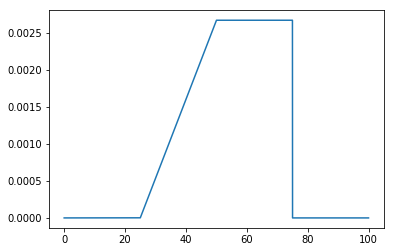

In [75]:
integrated = scipy.integrate.cumtrapz(y, dense_x).astype(int)
# plt.plot(dense_x[1:], integrated)
plt.plot(dense_x, y)
plt.plot(g.x, y_grid)
print(y_grid.sum()*g.dx - N)
print(y_grid)

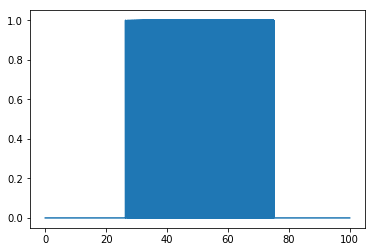

In [5]:
indices = (integrated[1:] - integrated[:-1]) == 1
plt.plot(dense_x[:-2], indices)

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1000000 but corresponding boolean dimension is 999998
  from ipykernel import kernelapp as app


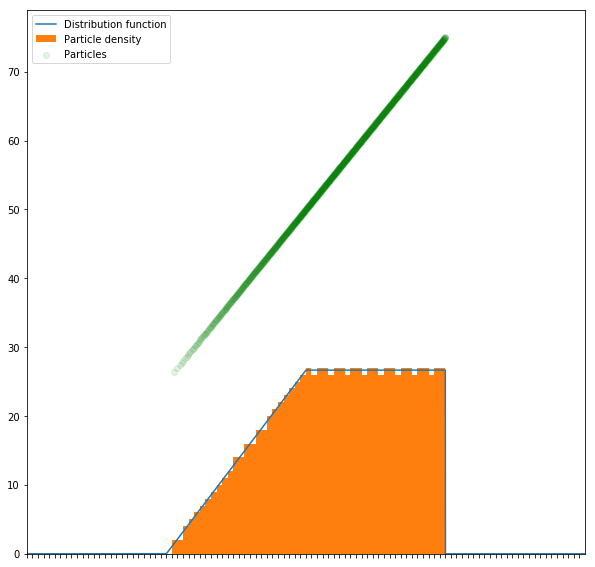

In [29]:
s = Species(1, 1, N)
s.x = dense_x[0:][indices]

plt.figure(figsize=(10,10))
plt.plot(dense_x, y, label="Distribution function")
plt.scatter(s.x, s.x, c="g", alpha=0.1, label="Particles")
plt.xlim(0, g.L)
plt.hist(s.x, g.x, label="Particle density");
plt.xticks(g.x)
# plt.grid()
plt.gca().xaxis.set_ticklabels([])
plt.legend()

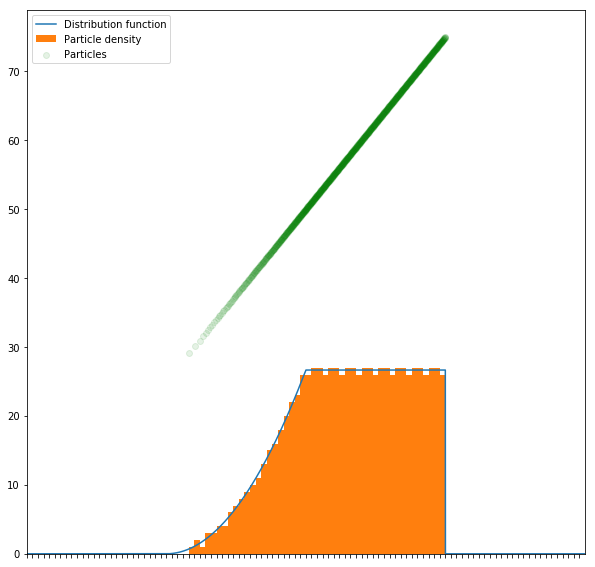

In [30]:
plt.figure(figsize=(10,10))
quadratic_distribution_function = density_profiles.FDENS(dense_x, moat_left, ramp_length, plasma_length, N, 'quadratic')
plt.plot(dense_x, quadratic_distribution_function, label="Distribution function")
s.distribute_nonuniformly(g.L, moat_left, ramp_length, plasma_length, profile='quadratic')
plt.scatter(s.x, s.x, c="g", alpha=0.1, label="Particles")
plt.xlim(0, g.L)
plt.hist(s.x, g.x, label="Particle density");
plt.xticks(g.x)
plt.gca().xaxis.set_ticklabels([])
plt.legend()

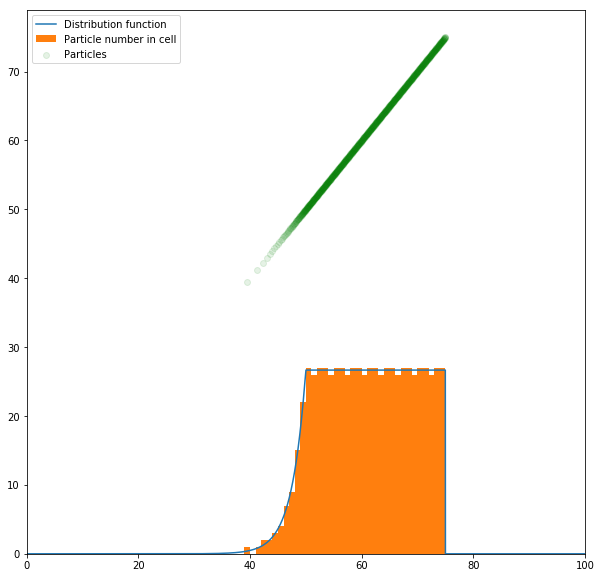

In [23]:
plt.figure(figsize=(10,10))
s = Species(1, 1, N)
exponential_distribution_function = density_profiles.FDENS(dense_x, moat_left, ramp_length, plasma_length, N, 'exponential')
plt.plot(dense_x, exponential_distribution_function, label="Distribution function")
s.distribute_nonuniformly(g.L, moat_left, ramp_length, plasma_length, profile='exponential')
plt.scatter(s.x, s.x, c="g", alpha=0.1, label="Particles")
plt.xlim(0, g.L)
plt.hist(s.x, g.x, label="Particle number in cell");
plt.xticks(g.x)
plt.gca().xaxis.set_ticklabels([])
plt.legend()

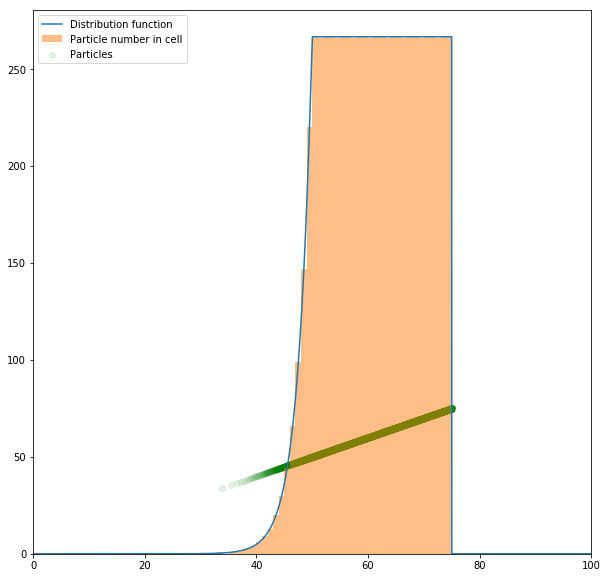

In [26]:
plt.figure(figsize=(10,10))
s = Species(1, 1, N * 10)
exponential2_distribution_function = density_profiles.FDENS(dense_x, moat_left, ramp_length, plasma_length, N*10, 'exponential')
plt.plot(dense_x, exponential2_distribution_function, label="Distribution function")
s.distribute_nonuniformly(g.L, moat_left, ramp_length, plasma_length, profile='exponential')
plt.xlim(0, g.L)
plt.hist(s.x, g.x, label="Particle number in cell", alpha=0.5);
plt.scatter(s.x, s.x, c="g", alpha=0.1, label="Particles")
plt.xticks(g.x)
plt.gca().xaxis.set_ticklabels([])
plt.legend()

sum of indices: 3757
0


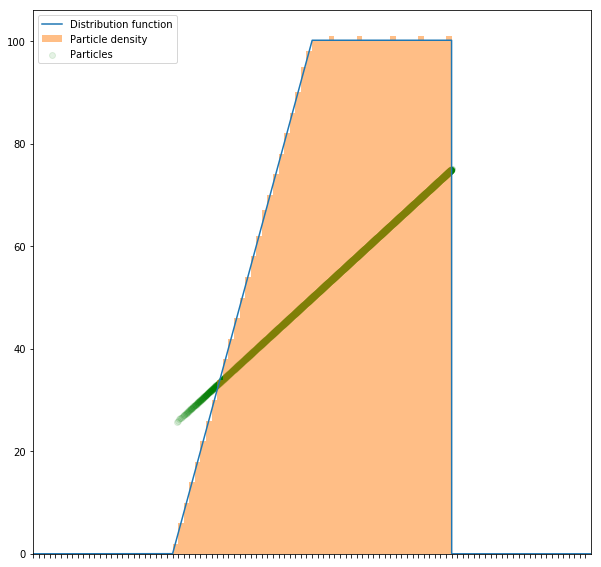

In [10]:
plt.figure(figsize=(10,10))
N = 3757
s = Species(1, 1, N, "particles")
linear_distribution_function = density_profiles.FDENS(dense_x, moat_left, ramp_length, plasma_length, N, 'linear')
s.distribute_nonuniformly(g.L, moat_left, ramp_length, plasma_length, profile='linear')

print(s.N - s.x.size)

plt.plot(dense_x, linear_distribution_function, label="Distribution function")
plt.scatter(s.x, s.x, c="g", alpha=0.1, label="Particles")
plt.hist(s.x, g.x, label="Particle density", alpha=0.5);
plt.xlim(0, g.L)
plt.xticks(g.x)
plt.gca().xaxis.set_ticklabels([])
plt.legend()